In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((475, 12, 1), (475,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
44/48 [==========================>...] - ETA: 0s - loss: 0.1715 - root_mean_squared_error: 0.4141

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 6s 90ms/step - loss: 0.1670 - root_mean_squared_error: 0.4086 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2201
Epoch 2/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0972 - root_mean_squared_error: 0.3117

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0988 - root_mean_squared_error: 0.3143 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2004
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.0754 - root_mean_squared_error: 0.2746

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 60ms/step - loss: 0.0754 - root_mean_squared_error: 0.2746 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 4/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0607 - root_mean_squared_error: 0.2463

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0572 - root_mean_squared_error: 0.2392 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1757
Epoch 5/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0502 - root_mean_squared_error: 0.2240

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 58ms/step - loss: 0.0474 - root_mean_squared_error: 0.2177 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 6/50
47/48 [============================>.] - ETA: 0s - loss: 0.0372 - root_mean_squared_error: 0.1928

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 70ms/step - loss: 0.0365 - root_mean_squared_error: 0.1911 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650
Epoch 7/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0306 - root_mean_squared_error: 0.1750

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0303 - root_mean_squared_error: 0.1739 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1611
Epoch 8/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0326 - root_mean_squared_error: 0.1805

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 55ms/step - loss: 0.0297 - root_mean_squared_error: 0.1723 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1611
Epoch 9/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1574

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555
Epoch 10/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1395

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 70ms/step - loss: 0.0206 - root_mean_squared_error: 0.1435 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 11/50
48/48 [==============================] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1395

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 70ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 12/50
48/48 [==============================] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1339

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 67ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 13/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1418
Epoch 14/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1409
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 16/50
47/48 [============================>.] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1376

INFO:tensorflow:Assets written to: Bering_model_LT7\assets


INFO:tensorflow:Assets written to: Bering_model_LT7\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0190 - root_mean_squared_error: 0.1380 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1330
Epoch 17/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 18/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0208 - root_mean_squared_error: 0.1441 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494
Epoch 19/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0212 - root_mean_squared_error: 0.1455 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1585
Epoch 20/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0214 - root_mean_squared_error: 0.1464 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 21/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0258 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.8631669322649638 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

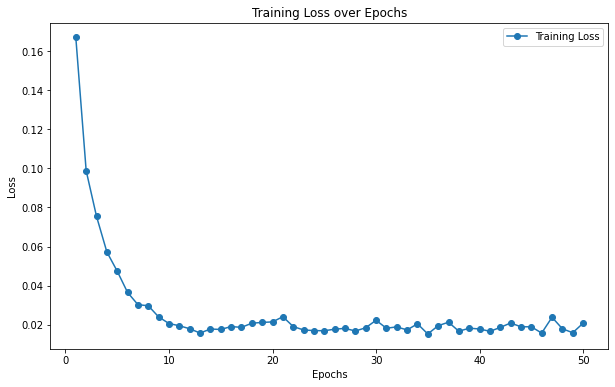

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

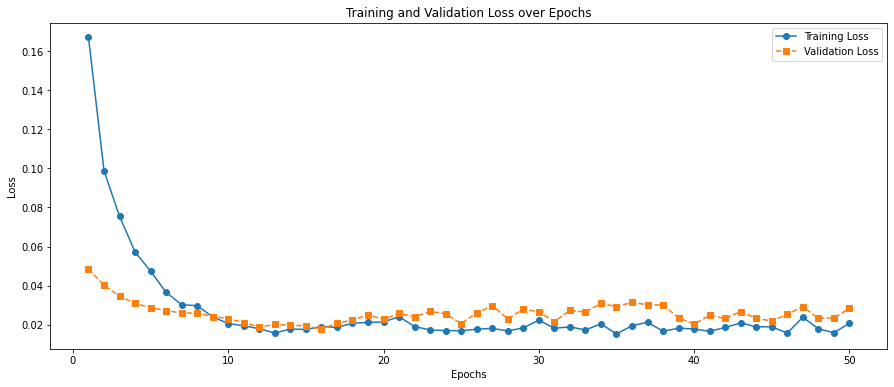

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.11362608658027439
MAE : 0.08473222737445582


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,506227.343750,151973.751
1,465981.781250,466524.938
2,544468.500000,708542.184
3,426686.562500,652598.000
4,355311.718750,414216.785
5,246288.375000,236263.303
6,150769.359375,43422.368
7,84827.312500,2161.744
8,134009.750000,944.181
9,116518.226562,13977.643


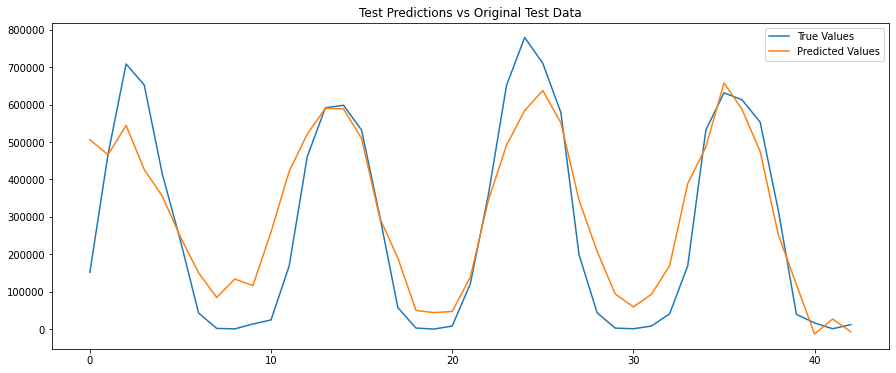

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 1ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

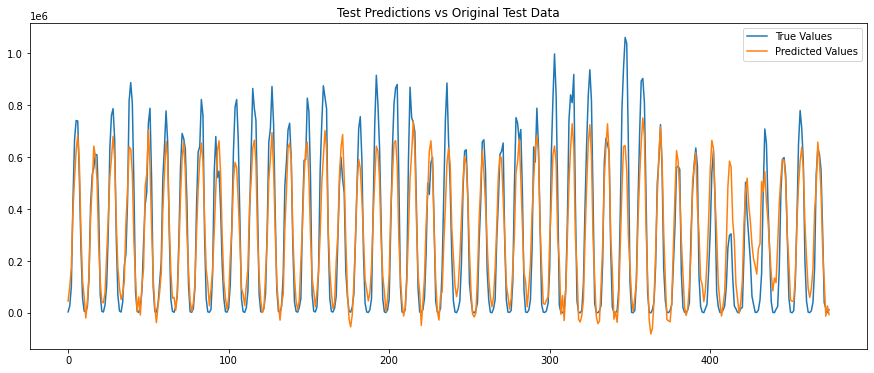

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()